In [2]:
import numpy as np 
import pandas as pd 
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_digits
from sklearn import metrics
%matplotlib inline

import os
import warnings
warnings.filterwarnings('ignore')

In [3]:
cancer = load_breast_cancer()
digits = load_digits()

data = cancer

In [4]:
df = pd.DataFrame(data= np.c_[data['data'], data['target']],
                     columns= list(data['feature_names']) + ['target'])
df['target'] = df['target'].astype('uint16')

In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
##let's create X and y
X = df.drop('target',axis=1)
y = df['target']

#splitting the data
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=101,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 30)
(114, 30)
(455,)
(114,)


In [8]:
##Let's check the average cancer scenarios in each of the train and test y variables since they should be comparable
print(y_train.mean())
print(y_test.mean())

0.6263736263736264
0.631578947368421


In [9]:
##base estimator:a weak learner with max_depth=2
shallow_tree = DecisionTreeClassifier(max_depth=2,random_state=100)

In [10]:
#fitting on the shallow tree
shallow_tree.fit(X_train,y_train)

#test error
y_pred = shallow_tree.predict(X_test)
score = metrics.accuracy_score(y_test,y_pred)
score

0.9385964912280702

In [14]:
#adaboost with shallow tree as a base estimator
estimator = list(range(1,50,3))

abc_scores =[]
for i,est in enumerate(estimator):
    model = AdaBoostClassifier(base_estimator=shallow_tree,
                         n_estimators = est)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score = metrics.accuracy_score(y_test,y_pred)
    abc_scores.append(score)

In [15]:
abc_scores

[0.9473684210526315,
 0.9298245614035088,
 0.9473684210526315,
 0.9736842105263158,
 0.9649122807017544,
 0.9473684210526315,
 0.9473684210526315,
 0.9649122807017544,
 0.9473684210526315,
 0.956140350877193,
 0.9649122807017544,
 0.9912280701754386,
 0.9912280701754386,
 0.9912280701754386,
 0.9912280701754386,
 0.9473684210526315,
 0.9912280701754386]

In [19]:
score_df = pd.DataFrame({'Estimator':list(range(1,50,3)),
            'Accuracy':abc_scores})
score_df.sort_values(by='Accuracy',ascending=False)

,Estimator,Accuracy
16,49,0.991228
11,34,0.991228
14,43,0.991228
13,40,0.991228
12,37,0.991228
3,10,0.973684
4,13,0.964912
7,22,0.964912
10,31,0.964912
9,28,0.956140


In [20]:
##Let's now change the n_estimator values and checkout the accuracy score
estimators =list(range(1, 200, 3))

In [21]:
abc_scores =[]
for i,est in enumerate(estimators):
    model = AdaBoostClassifier(base_estimator=shallow_tree,
                         n_estimators = est)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score = metrics.accuracy_score(y_test,y_pred)
    abc_scores.append(score)

In [23]:
score_df1 = pd.DataFrame({'Estimator':list(range(1,200,3)),
            'Accuracy':abc_scores})
score_df1.sort_values(by='Accuracy',ascending=False)

,Estimator,Accuracy
16,49,0.991228
39,118,0.991228
24,73,0.991228
23,70,0.991228
22,67,0.991228
...,...,...
5,16,0.947368
0,1,0.947368
4,13,0.938596
3,10,0.938596


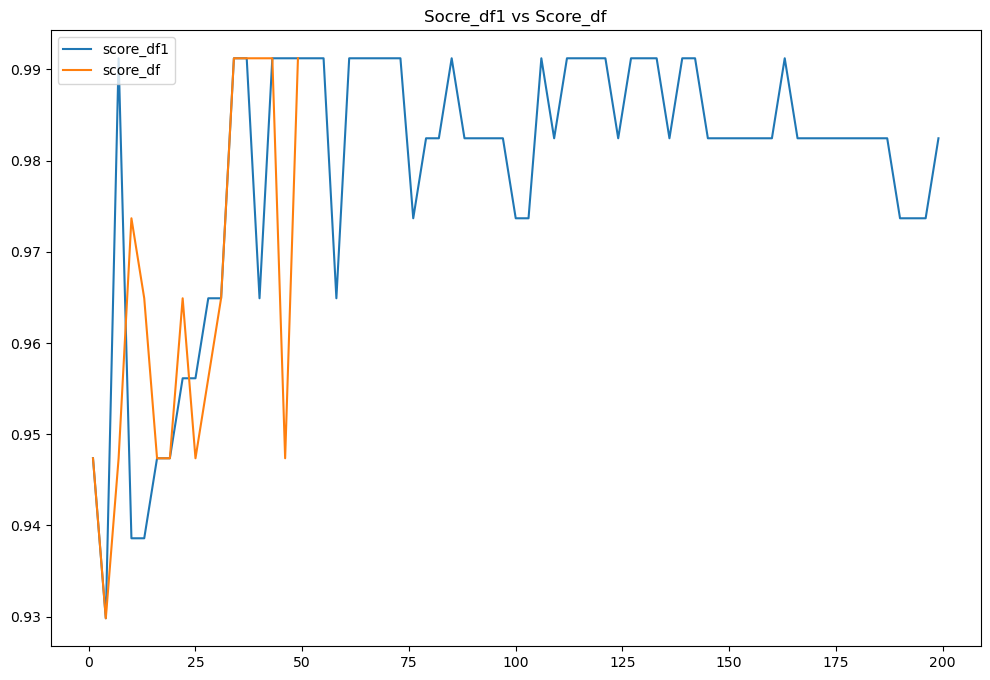

In [25]:
#Let's plot a graph and comparing both the accuracies
plt.figure(figsize=(12,8))
plt.plot(score_df1['Estimator'],score_df1['Accuracy'],label = 'score_df1')
plt.plot(score_df['Estimator'],score_df['Accuracy'],label = 'score_df')
plt.legend(loc='upper left')
plt.title('Socre_df1 vs Score_df')
plt.show()